#Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter

results = pd.read_csv('results.csv')

total_palavras = 0
tamanho_vocabulario = 0
mais_de_mil = {}
uma_vez = {}
total_palavras_unidas = []
palavras = {}

for i in results['text']:
  bordao = re.findall(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})', i)
  total_palavras_unidas += bordao
  total_palavras += len(bordao)

palavras = Counter(total_palavras_unidas)
unica_vez = len([j for j in palavras.values() if j == 1])
mais_de_mil = len([j for j in palavras.values() if j > 1000])

print('Total documents: ' + str(results.shape[0]))
print('Total words ocurrences: ' + str(total_palavras))
print('Vocabulary size: ' + str(len(palavras)))
print('Words occurring > 1000 times: ' + str(mais_de_mil))
print('Words occurring once: ' + str(unica_vez))

Total documents: 249
Total words ocurrences: 154664
Vocabulary size: 24048
Words occurring > 1000 times: 9
Words occurring once: 12071


#Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção

In [0]:
as_50_mais = sorted(palavras.items(), key = lambda x: x[1], reverse = True)
ranked = 1
tabela = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela['Word'] = [p[0] for p in as_50_mais]
tabela['Frequency'] = [p[1] for p in as_50_mais]
tabela['r'] = [r + 1 for r in range(0, len(as_50_mais))]
tabela['Pr(%)'] = [round((p[1] / total_palavras) *100, 2) for p in as_50_mais]
tabela['r.Pr'] = round((tabela['Pr(%)']/100)*tabela['r'], 3)

tabela.head(50)

,Word,Frequency,r,Pr(%),r.Pr
0,que,6527,1,5.17,0.052
1,para,2221,2,1.76,0.035
2,uma,2114,3,1.67,0.050
3,com,2099,4,1.66,0.066
4,por,1239,5,0.98,0.049
5,como,1226,6,0.97,0.058
6,mais,1180,7,0.93,0.065
7,dos,1058,8,0.84,0.067
8,sua,762,9,0.60,0.054
9,das,705,10,0.56,0.056


#Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva

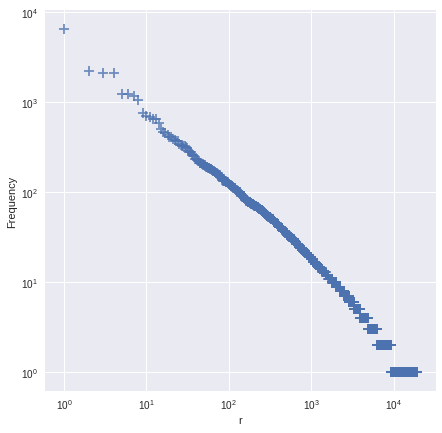

In [0]:
f, ax = plt.subplots(figsize=(7, 7))

ax.set(xscale="log", yscale="log")

sns.regplot("r", "Frequency", tabela, ax=ax, marker="+", fit_reg = False,scatter_kws={"s": 100})

#Reproduza a tabela 4.5 do livro texto considerando a sua coleção

In [0]:
maisTabela = pd.DataFrame()
maisTabela["NumeroOcorrencias"] = palavras.values()
maisTabela = maisTabela.groupby(['NumeroOcorrencias'])["NumeroOcorrencias"].size().reset_index(name = 'NumeroAtualPalavras')
maisTabela['ProporcaoPrevista'] = round(1 / (maisTabela['NumeroOcorrencias']*(maisTabela['NumeroOcorrencias'] + 1)), 3)
maisTabela['ProporcaoAtual'] = round(maisTabela['NumeroAtualPalavras'] / len(palavras), 3)
maisTabela.head(10)

,NumeroOcorrencias,NumeroAtualPalavras,ProporcaoPrevista,ProporcaoAtual
0,1,9660,0.500,0.507
1,2,3074,0.167,0.161
2,3,1473,0.083,0.077
3,4,935,0.050,0.049
4,5,648,0.033,0.034
5,6,428,0.024,0.022
6,7,325,0.018,0.017
7,8,298,0.014,0.016
8,9,215,0.011,0.011
9,10,204,0.009,0.011
